In [99]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
corr_matrix = train.corr()
corr_matrix = corr_matrix['Survived'].sort_values(ascending=False)
corr_matrix

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [102]:
#plt.figure(figsize=(100,50))
#train.hist(bins=5)

In [103]:
from sklearn.impute import SimpleImputer
train.iloc[:,-1] = train.iloc[:,-1].fillna("S")

In [104]:
embarked_dummies = pd.get_dummies(train["Embarked"],drop_first=True)
sex_dummies = pd.get_dummies(train["Sex"],drop_first=True)

In [105]:
train.drop(["Embarked"],axis=1,inplace=True)
train.drop(["Sex"],axis=1,inplace=True)

In [106]:
train = pd.concat([train,embarked_dummies,sex_dummies],axis=1)
tf = train.corr()

In [107]:
train["Age"].fillna(train["Age"].median(),inplace=True)

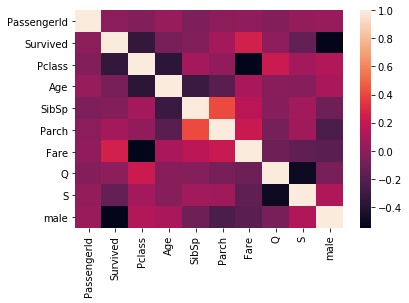

In [108]:
sns.heatmap(tf)

In [109]:
x = train.iloc[:,[2,4,5,6,8,-3,-2,-1]].values

In [110]:
x

array([[ 3., 22.,  1., ...,  0.,  1.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 3., 28.,  1., ...,  0.,  1.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       [ 3., 32.,  0., ...,  1.,  0.,  1.]])

In [111]:
y = train["Survived"].values

In [112]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_1 = StandardScaler()
x = ss.fit_transform(x)
x.shape

(891, 8)

In [113]:
x

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -0.30756234,
         0.61583843,  0.73769513],
       [-1.56610693,  0.66386103,  0.43279337, ..., -0.30756234,
        -1.62380254, -1.35557354],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -0.30756234,
         0.61583843, -1.35557354],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -0.30756234,
         0.61583843, -1.35557354],
       [-1.56610693, -0.25833709, -0.4745452 , ..., -0.30756234,
        -1.62380254,  0.73769513],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  3.25137334,
        -1.62380254,  0.73769513]])

In [139]:
from sklearn.feature_selection import SelectKBest , f_classif
selector = SelectKBest(score_func=f_classif,k = 6)
x = selector.fit_transform(x,y)
x

array([[ 0.82737724, -0.56573646, -0.47367361, -0.50244517,  0.61583843,
         0.73769513],
       [-1.56610693,  0.66386103, -0.47367361,  0.78684529, -1.62380254,
        -1.35557354],
       [ 0.82737724, -0.25833709, -0.47367361, -0.48885426,  0.61583843,
        -1.35557354],
       ...,
       [ 0.82737724, -0.1046374 ,  2.00893337, -0.17626324,  0.61583843,
        -1.35557354],
       [-1.56610693, -0.25833709, -0.47367361, -0.04438104, -1.62380254,
         0.73769513],
       [ 0.82737724,  0.20276197, -0.47367361, -0.49237783, -1.62380254,
         0.73769513]])

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
svc = SVC()
lr = LogisticRegression()
gnb = GaussianNB()
rtc = RandomForestClassifier(criterion = 'entropy' , max_features = 'auto', n_estimators = 30 , random_state=42)
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier(n_neighbors=15)




In [115]:
val_score = cross_val_score(rtc,x,y,scoring="accuracy",cv = 10)
val_score


array([0.75555556, 0.78888889, 0.75280899, 0.85393258, 0.88764045,
       0.82022472, 0.80898876, 0.76404494, 0.82022472, 0.84090909])

[0.707372886165021,
 0.7923794120985133,
 0.7823419589149927,
 0.8081979911474294,
 0.776774202701169,
 0.7095570877312452]

In [116]:
from sklearn.model_selection import GridSearchCV


In [117]:
# gsv_knc = GridSearchCV(knc,param_grid={"n_neighbors" : range(1,101)})
# gsv_knc.fit(x,y)
# knc_pred = gsv_knc.best_params_
# knc_pred

In [118]:
#gsv_forest.fit(x,y)

In [119]:
#acc = gsv_forest.best_params_
#print(acc)

In [120]:
test = pd.read_csv("test.csv")

In [121]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [123]:
test["Age"].fillna(test["Age"].median(),inplace=True)
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [124]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [125]:
embarked_dummies_1 = pd.get_dummies(test["Embarked"],drop_first=True)
sex_dummies_1 = pd.get_dummies(test["Sex"],drop_first=True)
test.drop(["Embarked"],axis=1,inplace=True)
test.drop(["Sex"],axis=1,inplace=True)
test = pd.concat([test,embarked_dummies_1,sex_dummies_1],axis=1)


In [126]:
test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Q,S,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",27.0,0,0,A.5. 3236,8.0500,NaN,0,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1
416,1308,3,"Ware, Mr. Frederick",27.0,0,0,359309,8.0500,NaN,0,1,1


In [127]:
x_1 = test.iloc[:,[1,3,4,5,7,9,10,11]].values

In [128]:
x_1 = x_1.astype("int")

In [129]:
x_1 = ss_1.fit_transform(x_1)

(418, 8)

(891, 8)

In [131]:
rtc.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [132]:
test_predicted = rtc.predict(x_1)

In [133]:
result = pd.DataFrame([test.iloc[:,0],test_predicted])

In [134]:
result = result.T

In [135]:
result.rename(columns={"Unnamed 0" : "Survived"},inplace=True)

In [136]:
result.to_csv("result.csv",index=None)

In [137]:
result.shape

(418, 2)